In [1]:
import numpy as np
import matplotlib.pyplot as plt

En este código se intentará replicar los resultados de los artículos J. G. OBrien et al, 2018 y X. Lin et al, 2017 para los cuales las velocidades circulares mondianas para Simple y Standard son las siguientes:

$V_{M} = \frac{V_N}{2} \sqrt{1 + \sqrt{1 + \frac{4a_0 R}{V^2_N}}}$  y $V_M = \sqrt{ \sqrt{ \frac{V^4_N}{2} + \sqrt{ \frac{V^8_N}{4} + R^2 a^2_0 V^4_N }} }$ respectivamente.

Para R.A.R. Tomamos la función te interpolación de V.Marra et al, 2020. De donde se obtiene que la velocidad circular mondiana es:

$V_M = \frac{V_N}{\sqrt{ 1 - e^{-\sqrt{ \frac{V^2_N}{Ra_0} }} }}$.

Primero se atacará el problema para el disco exponencial, posteriormente, se tratará el disco exponencial junto a el perfil de Hernquist.

In [2]:
## Creamos el vector r [1 kpc], desde 0 hasta 50 con paso de 0.01

r = np.arange(0.001, 50.1, 0.01)  ## Unidad de referencia de longitud 1kpc

## Definamos las constantes

G = 430007.1  ## Unidad de referencia de tiempo 1.1Gyr

a_0 = 4679.4 ## [kpc/Gyr^2]

In [3]:
## Definimos las funciones de la velocidad circular del disco y del bulbo 

from scipy.special import i0, i1, k0, k1

def V_Disco(M_d, R_d, r):
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    V_Disco = np.sqrt(vel_cir_disco_cuadrado)
    return V_Disco

def V_Bulbo(M_b, b, r):
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+b)*(r+b))
    V_Bulbo = np.sqrt(vel_cir_bulbo_cuadrado)
    return V_Bulbo


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
## Definimos las velocidades circulares mondianas para R.A.R., Simple y Standard

def V_RAR_Disco(M_d, R_d, r):
    V_RAR_Disco = V_Disco(M_d, R_d, r) / (np.sqrt(1.0 - np.exp(-np.sqrt(V_Disco(M_d, R_d, r)*V_Disco(M_d, R_d, r) 
                                                                        / ( r * a_0 )))))
    return V_RAR_Disco

def V_Simple_Disco(M_d, R_d, r):
    V_Simple_Disco = (V_Disco(M_d, R_d, r) / np.sqrt(2.0)) * np.sqrt(1.0 + 4.0*a_0*r / 
                                                                     (V_Disco(M_d, R_d, r)*V_Disco(M_d, R_d, r)))
    return V_Simple_Disco

def V_Standard_Disco(M_d, R_d, r):
    V_N_4 = V_Disco(M_d, R_d, r) * V_Disco(M_d, R_d, r) * V_Disco(M_d, R_d, r) * V_Disco(M_d, R_d, r)
    V_Standard_cuadrado = np.sqrt(V_N_4 / 2.0 + np.sqrt(V_N_4*V_N_4/4.0 + r*r*a_0*a_0*V_N_4))
    V_Standard_Disco = np.sqrt(V_Standard_cuadrado)
    return V_Standard_Disco

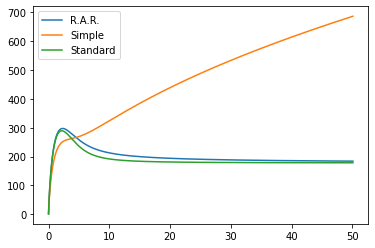

In [5]:
plt.plot(r, V_RAR_Disco(1, 1, r), label='R.A.R.')
plt.plot(r, V_Simple_Disco(1, 1, r), label='Simple')
plt.plot(r, V_Standard_Disco(1, 1, r), label='Standard')
plt.legend()

In [6]:
## Agregamos el bulbo


def V_RAR(M_b, b, M_d, R_d, r):
    V_N = np.sqrt(V_Bulbo(M_b, b, r)*V_Bulbo(M_b, b, r) + V_Disco(M_d, R_d, r)*V_Disco(M_d, R_d, r))
    V_RAR = V_N / (np.sqrt(1.0 - np.exp(-np.sqrt(V_N*V_N / ( r * a_0 )))))
    return V_RAR

def V_Simple(M_b, b, M_d, R_d, r):
    V_N = np.sqrt(V_Bulbo(M_b, b, r)*V_Bulbo(M_b, b, r) + V_Disco(M_d, R_d, r)*V_Disco(M_d, R_d, r))
    V_Simple = (V_N / np.sqrt(2.0)) * np.sqrt(1.0 + 4.0*a_0*r / (V_N*V_N))
    return V_Simple

def V_Standard(M_b, b, M_d, R_d, r):
    V_N = np.sqrt(V_Bulbo(M_b, b, r)*V_Bulbo(M_b, b, r) + V_Disco(M_d, R_d, r)*V_Disco(M_d, R_d, r))
    V_N_4 = V_N * V_N * V_N * V_N
    V_Standard_cuadrado = np.sqrt(V_N_4 / 2.0 + np.sqrt(V_N_4*V_N_4/4.0 + r*r*a_0*a_0*V_N_4))
    V_Standard = np.sqrt(V_Standard_cuadrado)
    return V_Standard

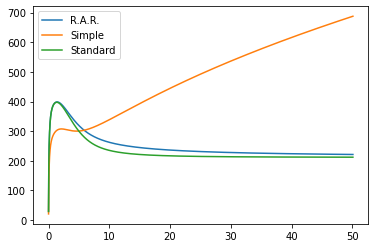

In [7]:
plt.plot(r, V_RAR(0.5, 0.5, 1, 1, r), label='R.A.R.')
plt.plot(r, V_Simple(0.5, 0.5, 1, 1, r), label='Simple')
plt.plot(r, V_Standard(0.5, 0.5, 1, 1, r), label='Standard')
plt.legend()

In [8]:
## Galaxia real

import pandas as pd

datos = pd.read_csv('Datos_NGC2403_CurvaRotacion', sep='   ')

/tmp/ipykernel_14598/2401265028.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_14598/2401265028.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos = pd.read_csv('Datos_NGC2403_CurvaRotacion', sep='   ')


In [9]:
datos.head()

,R(kpc),V(km/s)
0,0.05,53.95123
1,0.10,60.44677
2,0.15,66.02752
3,0.20,69.54928
4,0.25,71.69053


In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R(kpc)   394 non-null    float64
 1   V(km/s)  394 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


In [11]:
x = np.array(datos['R(kpc)'])
y = np.array(datos['V(km/s)'])

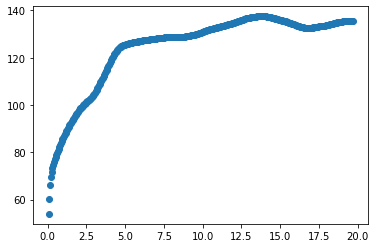

In [12]:
plt.scatter(x, y)

Ahora vamos a probar las velocidades circulares mondianas con una galaxia real, de la cual sabemos, según X. Kang et al, 2023, que $R_d = 1.6 Kpc$ y la masa estelar $M_{estelar} = 5.01 x 10^9 M_{solares}$.

In [13]:
from scipy.optimize import curve_fit

Error M_b: 13.900598365281422 
Error R_b: 15289.658511324726 
Error M_d: 63729285.31572372 
Error R_d: 41.28946614732924
M_b= 0.9999999999999999 
R_b= 0.0010000000000000002 
M_d= 9.999999999999998 
R_d= 2.9999999999999996


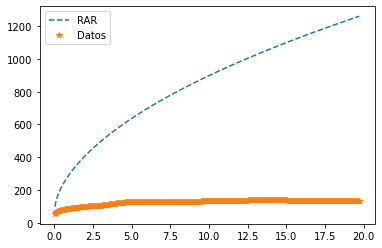

In [14]:
## R.A.R.

## Recordemos: V_RAR(M_b, b, M_d, R_d, r)

p_inicial = (0.5, 0.5, 1.0, 1.0)

limite_inferior = [0.001, 0.001, 0.1, 1]
limite_superior = [1, 1.0, 10.0, 3.0]

params_RAR, cov_RAR = curve_fit(V_RAR, x, y, method='trf', p0=p_inicial, bounds=(limite_inferior, limite_superior))


error_RAR = np.sqrt(np.diag(cov_RAR))

print('Error M_b:', error_RAR[0], '\nError R_b:', error_RAR[1], '\nError M_d:', error_RAR[2], 
      '\nError R_d:', error_RAR[3])


print('M_b=', params_RAR[0], '\nR_b=', params_RAR[1], '\nM_d=', params_RAR[2], '\nR_d=', params_RAR[3])

y_pred_RAR = V_RAR(x, params_RAR[0], params_RAR[1], params_RAR[2], params_RAR[3])


plt.plot(x, y_pred_RAR, '--', label='RAR')
plt.plot(x, y, '*', label='Datos')
plt.legend()

Error M_b: 113258.28715216652 
Error R_b: 4234577.71855812 
Error M_d: 44880200.65654347 
Error R_d: 339774.8209207311
M_b= 0.9999999999999999 
R_b= 0.0010000000000000002 
M_d= 9.999999999999998 
R_d= 2.9999999999999996


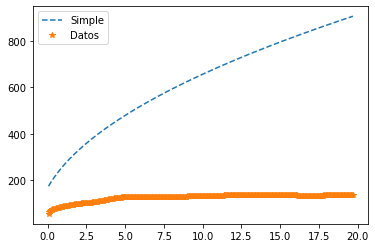

In [15]:
## Simple

## Recordemos: V_Simple(M_b, b, M_d, R_d, r)

p_inicial = (0.5, 0.5, 1.0, 1.0)

limite_inferior = [0.001, 0.001, 0.1, 1]
limite_superior = [1, 1.0, 10.0, 3.0]

params_Simple, cov_Simple = curve_fit(V_Simple, x, y, method='trf', p0=p_inicial, 
                                      bounds=(limite_inferior, limite_superior))


error_Simple = np.sqrt(np.diag(cov_Simple))

print('Error M_b:', error_Simple[0], '\nError R_b:', error_Simple[1], '\nError M_d:', error_Simple[2], 
      '\nError R_d:', error_Simple[3])


print('M_b=', params_Simple[0], '\nR_b=', params_Simple[1], '\nM_d=', params_Simple[2], '\nR_d=', params_Simple[3])

y_pred_Simple = V_Simple(x, params_Simple[0], params_Simple[1], params_Simple[2], params_Simple[3])


plt.plot(x, y_pred_Simple, '--', label='Simple')
plt.plot(x, y, '*', label='Datos')
plt.legend()

Error M_b: 33.18239690969942 
Error R_b: 13515.34808634104 
Error M_d: 56339221.27062559 
Error R_d: 98.88003254247444
M_b= 0.9999999999999999 
R_b= 0.0010000000000000002 
M_d= 9.999999999999998 
R_d= 2.9999999999999996


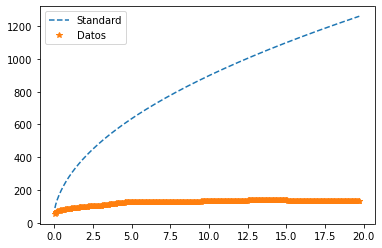

In [16]:
## Standard

## Recordemos: V_Standard(M_b, b, M_d, R_d, r)

p_inicial = (0.5, 0.5, 1.0, 1.0)

limite_inferior = [0.001, 0.001, 0.1, 1]
limite_superior = [1, 1.0, 10.0, 3.0]

params_Standard, cov_Standard = curve_fit(V_Standard, x, y, method='trf', p0=p_inicial, 
                                      bounds=(limite_inferior, limite_superior))


error_Standard = np.sqrt(np.diag(cov_Standard))

print('Error M_b:', error_Standard[0], '\nError R_b:', error_Standard[1], '\nError M_d:', error_Standard[2], 
      '\nError R_d:', error_Standard[3])


print('M_b=', params_Standard[0], '\nR_b=', params_Standard[1], '\nM_d=', params_Standard[2], 
      '\nR_d=', params_Standard[3])

y_pred_Standard = V_Standard(x, params_Standard[0], params_Standard[1], params_Standard[2], params_Standard[3])


plt.plot(x, y_pred_Standard, '--', label='Standard')
plt.plot(x, y, '*', label='Datos')
plt.legend()

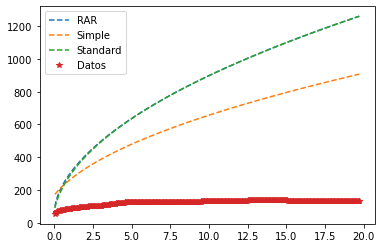

In [17]:
plt.plot(x, y_pred_RAR, '--', label='RAR')
plt.plot(x, y_pred_Simple, '--', label='Simple')
plt.plot(x, y_pred_Standard, '--', label='Standard')
plt.plot(x, y, '*', label='Datos')
plt.legend()